# cosmic rejection which is external to our analysis

In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, '../analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/ExternalCosmicRemoval/'

In [12]:
pandora_pairs,summary_pairs = dict(), dict()
pandoraNu_pairs , pandoraCosmic_pairs = dict(), dict()
path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/'
methods = ['withPandoraCosmicRemovalPass','withoutPandoraCosmicRemovalPass']
for method in methods:#,'with_pandoraCosmic_removal_pass','without_pandoraCosmic_removal_pass']:
    summary_pairs[method] = pd.read_csv(path + '/'+method+'/prodcosmics_corsika_cmc_uboone_mcc8.7_reco_summary.csv' ) #+ method  + '/prodcosmics_reco_'+method+'_joelam_summary.csv'
    pandora_pairs[method] = pd.read_csv(path + '/'+method+'/prodcosmics_corsika_cmc_uboone_mcc8.7_reco_pandora_vertices.csv' ) #+ method  + '/prodcosmics_reco_'+method+'_joelam_vertices.csv'
    pandoraNu_pairs[method] = pandora_pairs[method][pandora_pairs[method].isPandoraNu==True]
    pandoraCosmic_pairs[method] = pandora_pairs[method][pandora_pairs[method].isPandoraCosmic==True]
    print len(pandoraCosmic_pairs[method]),'pandoraCosmic pairs',len(pandoraNu_pairs[method]),'pandoraNu pairs','in',method
    print summary_pairs[method][['Nevents','NPandoraNuTracks','Nhits']]

4296 pandoraCosmic pairs 554 pandoraNu pairs in withPandoraCosmicRemovalPass
   Nevents  NPandoraNuTracks    Nhits
0     1000              6471  4398836
4238 pandoraCosmic pairs 679 pandoraNu pairs in withoutPandoraCosmicRemovalPass
   Nevents  NPandoraNuTracks    Nhits
0     1000             22103  4511730


In [13]:
samples = [pandoraCosmic_pairs[methods[0]],pandoraNu_pairs[methods[0]],pandoraCosmic_pairs[methods[1]],pandoraNu_pairs[methods[1]]]
labels = ['pandoraCosmic pairs (with removal pass)','pandoraNu pairs (with removal pass)','pandoraCosmic pairs (without removal pass)','pandoraNu pairs (without removal pass)']
colors = ['teal','royalblue','tomato','black']

# inter-track separation distance

saved file  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/ExternalCosmicRemoval/separation_distance_with_without_pandoraCosmicPass.pdf


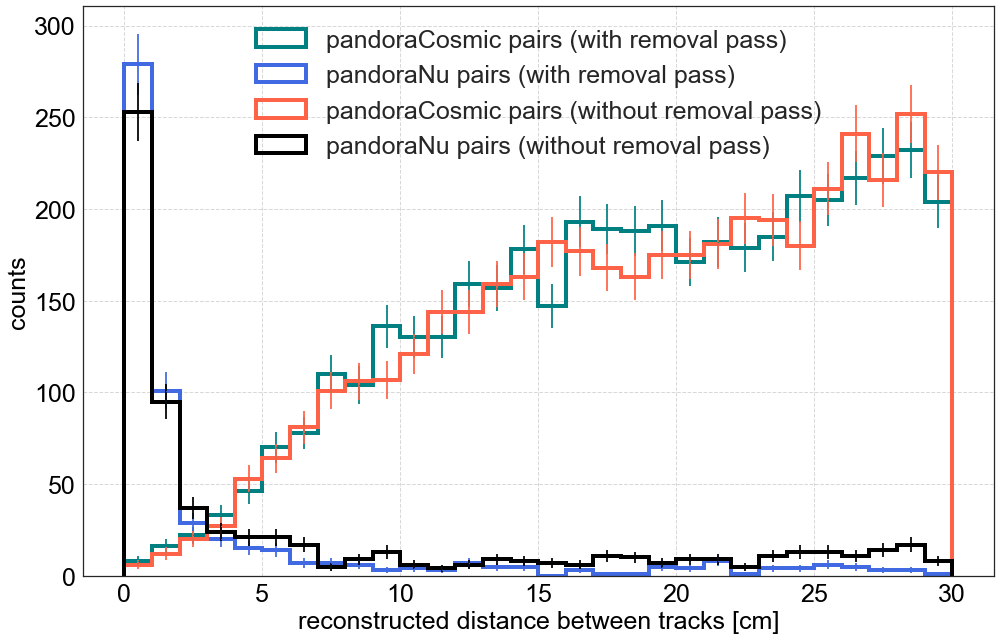

In [14]:
fig,ax=plt.subplots(figsize=(14,9))
h = dict()
for sample,label,color in zip(samples,labels,colors):
    d = sample['distance']
    h[label],bins,_ = plt.hist(d ,bins=np.linspace(0,30,31)
                        ,color=color,histtype='step',linewidth=4,label=label)
    mid = bins[1:] - 0.5*(bins[1]-bins[0])
    plt.errorbar(mid,h[label],yerr=np.sqrt(h[label]),fmt='o',markersize=1, color=color , ecolor=color, capthick=2)
set_axes(ax,'reconstructed distance between tracks [cm]' , 'counts'
#          ,xticks=[3,6,9,12]
         ,do_add_grid=True,do_add_legend=True,legend_loc='upper center')
plt.tight_layout()
plt.savefig(figures_path+'separation_distance_with_without_pandoraCosmicPass.pdf')
print 'saved file ',figures_path+'separation_distance_with_without_pandoraCosmicPass.pdf'

saved file  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/ExternalCosmicRemoval/ratio_removal_pass.pdf


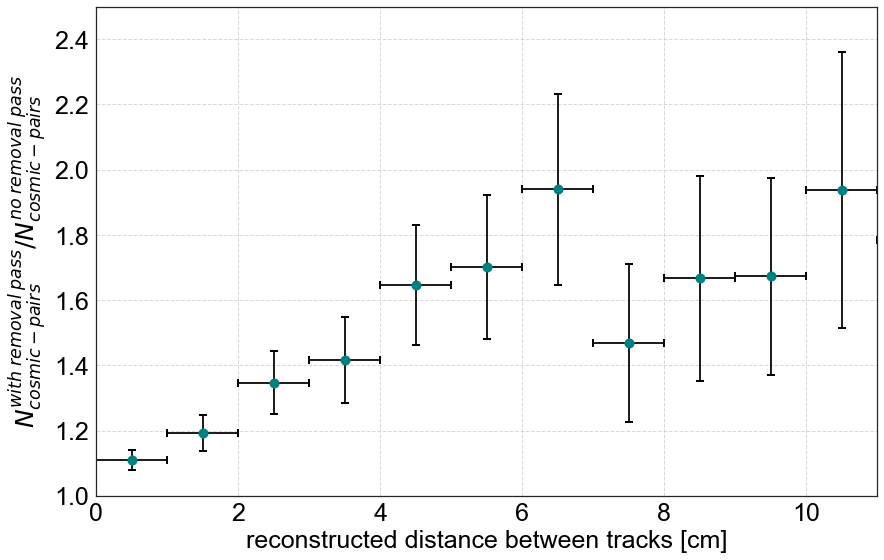

In [52]:
fig,ax=plt.subplots(figsize=(14,9))

h_pass = h['pandoraNu pairs (with removal pass)']
h_nopass = h['pandoraNu pairs (without removal pass)']
h_ratio = h_pass/h_nopass
h_ratio_err = h_ratio*np.sqrt(1./h_pass + 1./h_nopass)

plt.errorbar(mid,xerr=0.5*(bins[1]-bins[0]),y=h_ratio,yerr=h_ratio_err,fmt='o',markersize=10
             , color='teal' , ecolor=color, capthick=2, capsize=4)
set_axes(ax,'reconstructed distance between tracks [cm]' 
         , r'$N_{cosmic-pairs}^{{with \; removal \; pass}}/N_{cosmic-pairs}^{{no \; removal \; pass}}$'
         ,do_add_grid=True
         ,xlim=(0,11),ylim=(1.0,2.5))
plt.savefig(figures_path+'ratio_removal_pass.pdf')
print 'saved file ',figures_path+'ratio_removal_pass.pdf'

In [50]:
d_max = 11
print 'between 0<d<%d'%d_max
with_pass = np.sum(h_pass[0:d_max])
with_pass_unc = np.sqrt(with_pass)
print 'with pandoraCosmic removal pass: %d'%with_pass,'cosmic pairs'
no_pass = np.sum(h_nopass[0:d_max])
no_pass_unc = np.sqrt(no_pass)
print 'no pandoraCosmic removal pass: %d'%no_pass,'cosmic pairs'
frac_addition = 1 - float(no_pass)/with_pass
frac_addition_unc = (float(no_pass)/with_pass) * np.sqrt( 1./no_pass + 1./with_pass )
print "pandoraCosmic removal pass adds %.1f"%(100.*frac_addition),"% ","+/- %.1f"%(100.*frac_addition_unc),"% cosmic pairs"

between 0<d<11
with pandoraCosmic removal pass: 5373 cosmic pairs
no pandoraCosmic removal pass: 4396 cosmic pairs
pandoraCosmic removal pass adds 18.2 %  +/- 1.7 % cosmic pairs


41681 pandoraCosmic pairs 5224 pandoraNu pairs
saved file  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/ExternalCosmicRemoval/separation_distance.pdf


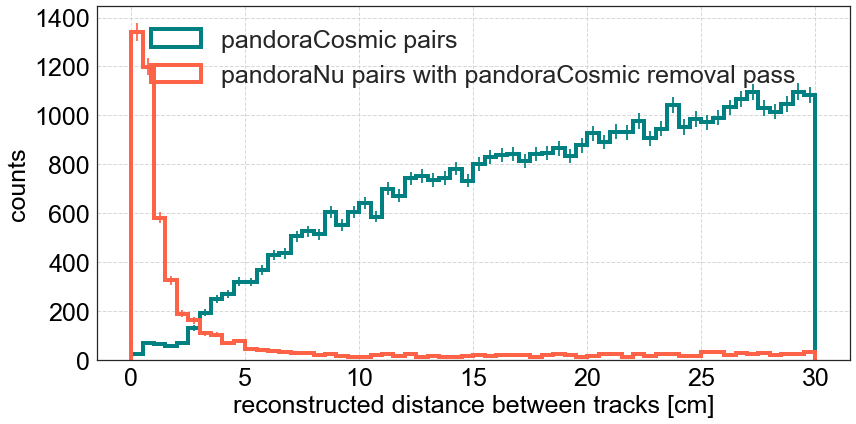

In [7]:
pandora_pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/prodcosmics_corsika_cmc_uboone_mcc8.4_2018_01_29_vertices.csv')
pandoraNu_pairs = pandora_pairs[pandora_pairs.isPandoraNu==True]
pandoraCosmic_pairs = pandora_pairs[pandora_pairs.isPandoraCosmic==True]
print len(pandoraCosmic_pairs),'pandoraCosmic pairs',len(pandoraNu_pairs),'pandoraNu pairs'
samples = [pandoraCosmic_pairs,pandoraNu_pairs]
labels = ['pandoraCosmic pairs','pandoraNu pairs with pandoraCosmic removal pass']
colors = ['teal','tomato']
fig,ax=plt.subplots(figsize=(12,6))
for sample,label,color in zip(samples,labels,colors):
    d = sample['distance']
    h,bins,_ = plt.hist(d 
                        , bins=np.linspace(0,30,61)
                        ,color=color,histtype='step',linewidth=4,label=label
                       )
    mid = bins[1:] - 0.5*(bins[1]-bins[0])
    plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color=color , ecolor=color, capthick=2)
set_axes(ax,'reconstructed distance between tracks [cm]' , 'counts'
         ,do_add_grid=True,do_add_legend=True,legend_loc='upper center')
plt.tight_layout()
plt.savefig(figures_path+'separation_distance.pdf')
print 'saved file ',figures_path+'separation_distance.pdf'

200372 pandoraCosmic pairs 25410 pandoraNu pairs


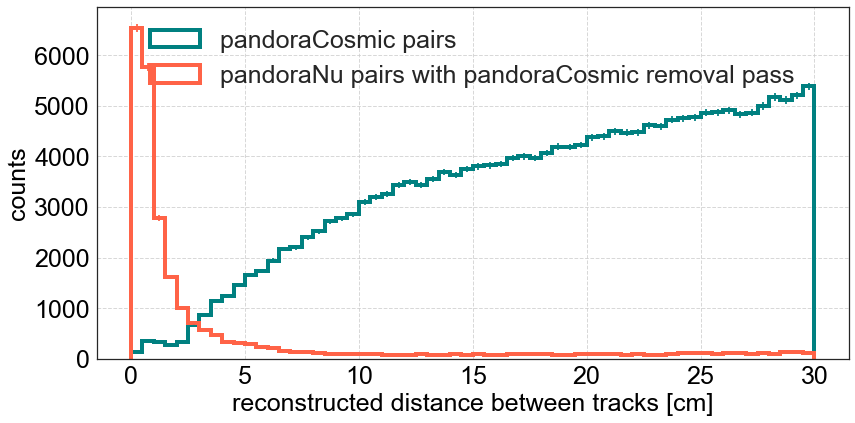

In [3]:
pandora_pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/prodcosmics_corsika_cmc_uboone_mcc8.7_withPandoraCosmic_pass_reco2_2018_02_26_vertices.csv')
pandoraNu_pairs = pandora_pairs[pandora_pairs.isPandoraNu==True]
pandoraCosmic_pairs = pandora_pairs[pandora_pairs.isPandoraCosmic==True]
print len(pandoraCosmic_pairs),'pandoraCosmic pairs',len(pandoraNu_pairs),'pandoraNu pairs'
samples = [pandoraCosmic_pairs,pandoraNu_pairs]
labels = ['pandoraCosmic pairs','pandoraNu pairs with pandoraCosmic removal pass']
colors = ['teal','tomato']
fig,ax=plt.subplots(figsize=(12,6))
for sample,label,color in zip(samples,labels,colors):
    d = sample['distance']
    h,bins,_ = plt.hist(d 
                        , bins=np.linspace(0,30,61)
                        ,color=color,histtype='step',linewidth=4,label=label
                       )
    mid = bins[1:] - 0.5*(bins[1]-bins[0])
    plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color=color , ecolor=color, capthick=2)
set_axes(ax,'reconstructed distance between tracks [cm]' , 'counts'
         ,do_add_grid=True,do_add_legend=True,legend_loc='upper center')
plt.tight_layout()